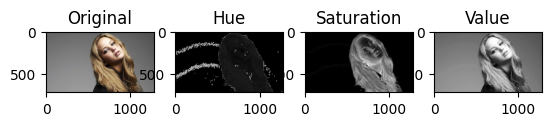

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('(6).jpg')  
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

#plot the 3 image in gray scale
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.subplot(142),plt.imshow(h,'gray'),plt.title('Hue')
plt.subplot(143),plt.imshow(s,'gray'),plt.title('Saturation')
plt.subplot(144),plt.imshow(v,'gray'),plt.title('Value')
plt.show()



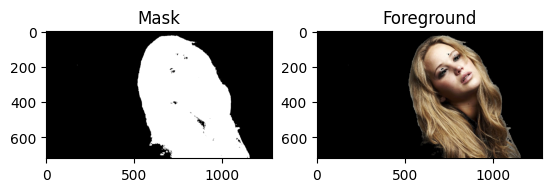

In [14]:
#apply threshold to extract forground mask from plane h
Threshold=15
ret, mask = cv2.threshold(s, Threshold, 128, cv2.THRESH_BINARY)


#plot the mask
plt.subplot(121),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(122),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
plt.show()


#mask1 = cv2.inRange(s, 0, 128)
#plot the mask
#plt.subplot(121),plt.imshow(mask1,'gray'),plt.title('Mask')
#plt.subplot(122),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
#plt.show()




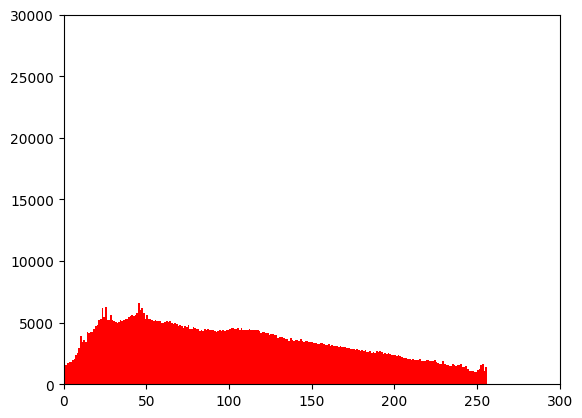

In [218]:

foreground=cv2.bitwise_and(img,img, mask= mask)
#plot the histogram of the foreground
 


plt.hist(foreground.flatten(),256,[0,256], color = 'r')
plt.xlim([0,300])
plt.ylim([0,30000])


plt.show()




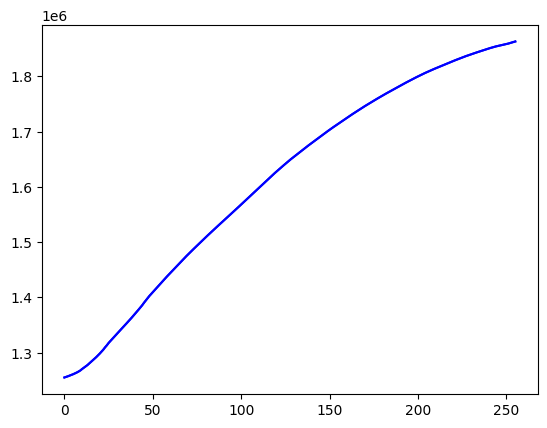

In [219]:
hist,bins = np.histogram(foreground.ravel(),256,[0,256])
cdf = np.cumsum(hist)
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.plot(cdf_normalized, color = 'b')


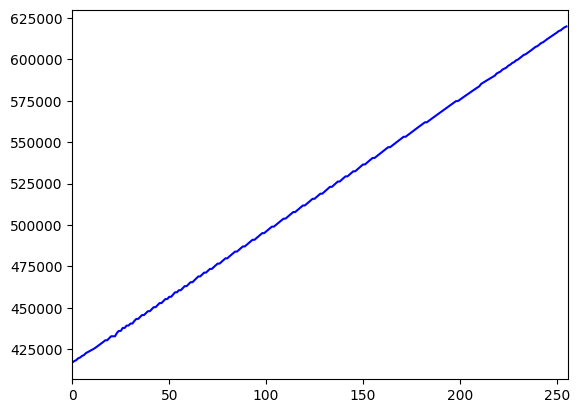

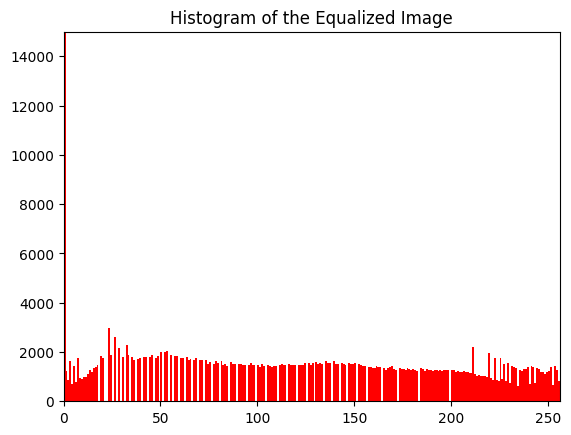

In [229]:
foreground=cv2.bitwise_and(img,img, mask= mask)
#xonvert foreground to gray scale
foreground=cv2.cvtColor(foreground,cv2.COLOR_RGB2GRAY)

equ = cv2.equalizeHist(foreground)



hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.xlim([0,256])
plt.show()

plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.ylim([0,15000])
plt.title('Histogram of the Equalized Image')
plt.show()


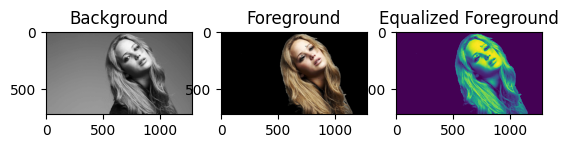

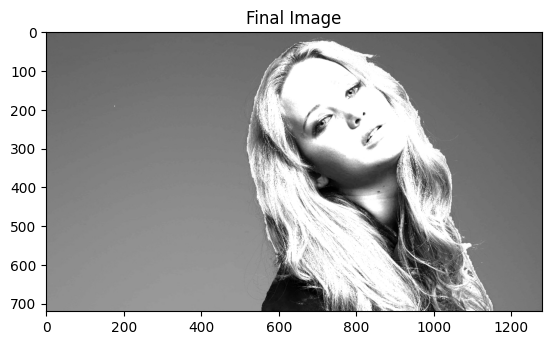

In [230]:

#extract background of the original image
background=cv2.bitwise_and(img,img, mask= cv2.bitwise_not(mask))
#convert background to gray scale
background=cv2.cvtColor(background,cv2.COLOR_RGB2GRAY)

#plot the background
plt.subplot(131),plt.imshow(background,'gray'),plt.title('Background')
plt.subplot(132),plt.imshow(cv2.bitwise_and(img,img, mask= mask)),plt.title('Foreground')
plt.subplot(133),plt.imshow(equ),plt.title('Equalized Foreground')
plt.show()
#add this to the equalized foreground
final=cv2.add(equ,background)
#convert to rgb
final=cv2.cvtColor(final,cv2.COLOR_GRAY2RGB)
#display the final image
plt.imshow(final),plt.title('Final Image')
plt.show()


